# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Understanding

## About Data
Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description:
 - **Age:** The age of the individual in years.
 - **Gender:** The gender of the individual, categorized as male or female.
 - **Profession:** The occupation or profession of the individual.
 - **Marital_status:** The marital status of the individual, such as married &, single.
 - **Education:** The educational qualification of the individual Graduate and Post Graduate.
 - **No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially.
 - **Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No".
 - **House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No".
 - **Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No".
 - **Salary:** The individual's salary or income.
 - **Partner_salary:** The salary or income of the individual's partner, if applicable.
 - **Total_salary:** The total combined salary of the individual and their partner (if applicable).
 - **Price:** The price of a product or service.
 - **Make:** The type of automobile.

In [3]:
data = pd.read_csv("bright_automotive_company.csv")
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [4]:
data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


In [5]:
data.shape

(1581, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [7]:
print("Statiscal Summary of numerical columns")
data.describe()

Statiscal Summary of numerical columns


,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [8]:
print("Total missing values in each column:")
data.isnull().sum()

Total missing values in each column:


Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [9]:
print("Total duplicate entries: ",len(data[data.duplicated()]))

Total duplicate entries:  0


In [10]:
data['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [11]:
# Checking for Anomalies or wrong entries
print("Anomalies in 'Age' columns:",len(data[(data['Age']<18) & (data['Age']>90)]))
print("Anomalies in  'Total_salary' columns:",len(data[data['Salary']+data['Partner_salary']!=data['Total_salary']]))

Anomalies in 'Age' columns: 0
Anomalies in  'Total_salary' columns: 119


In the dataset, it contain some null values, anomalies and misspell values.

# Data Cleaning and Transformation

In [12]:
cleaned_data = data.copy()

In [13]:
# Replace '?' to 0
cleaned_data['No_of_Dependents'].replace({'?':0},inplace=True)

# Replace '?' to Mode Make category
cleaned_data['Make'].replace({'?':cleaned_data['Make'].mode()[0]},inplace = True)

# Convert the dtype of 'No_of_Dependents' column
cleaned_data['No_of_Dependents'] = cleaned_data['No_of_Dependents'].astype(int)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int32  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(8)
memory usage: 166.9+ KB


In [20]:
# Replace null gender with mode gender value
cleaned_data.fillna({'Gender':cleaned_data['Gender'].mode()[0]},inplace=True)

# Replace null profession with mode profession value
cleaned_data.fillna({'Profession':cleaned_data['Profession'].mode()[0]},inplace=True)

# Replace null salary with mean salary value
cleaned_data.fillna({'Salary':round(cleaned_data['Salary'].mean(),2)},inplace=True)

# Replace null partner_salary with 0 if partner_working is No otherwise total_salary-salary value
cleaned_data.loc[cleaned_data['Partner_working'] == 'No', 'Partner_salary'] = 0
cleaned_data.loc[cleaned_data['Partner_working'] == 'Yes', 'Partner_salary'] = cleaned_data['Total_salary'] - cleaned_data['Salary']

In [21]:
cleaned_data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [22]:
cleaned_data['Gender'].value_counts()

Gender
Male      1252
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [23]:
# Speelling check
corrections = {'Femal':'Female','Femle':'Female'}
cleaned_data['Gender'] = cleaned_data['Gender'].replace(corrections)
cleaned_data['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

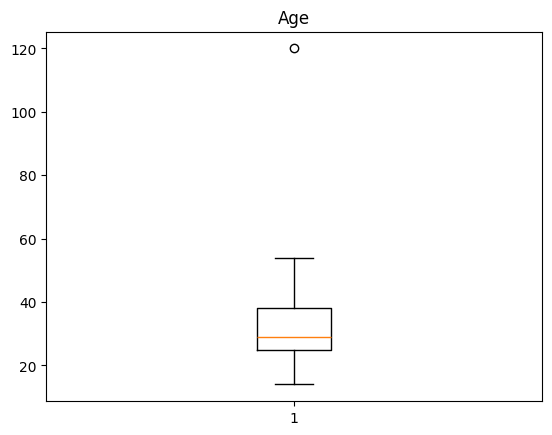

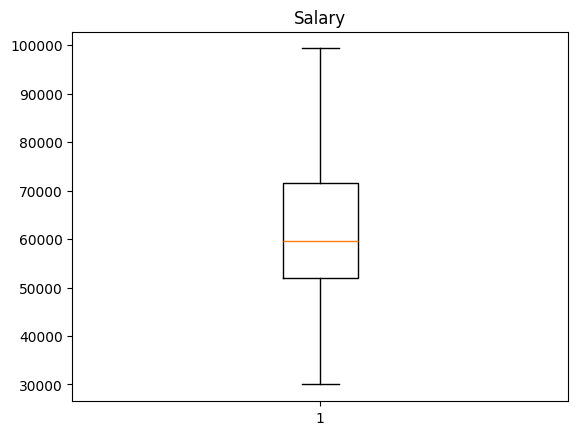

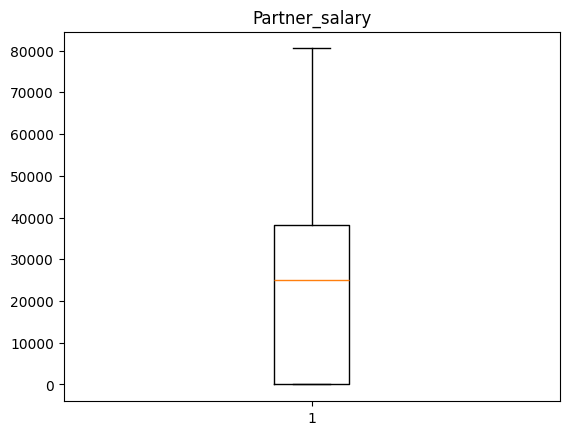

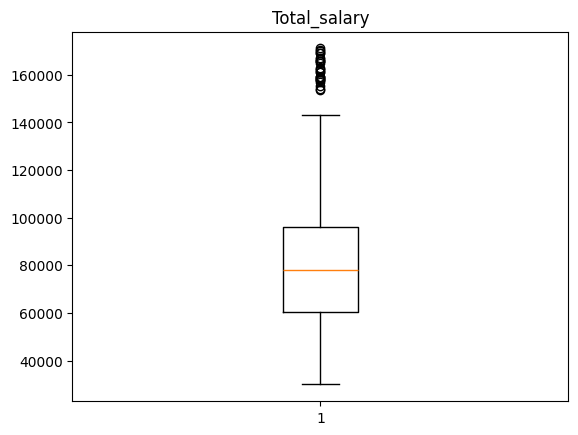

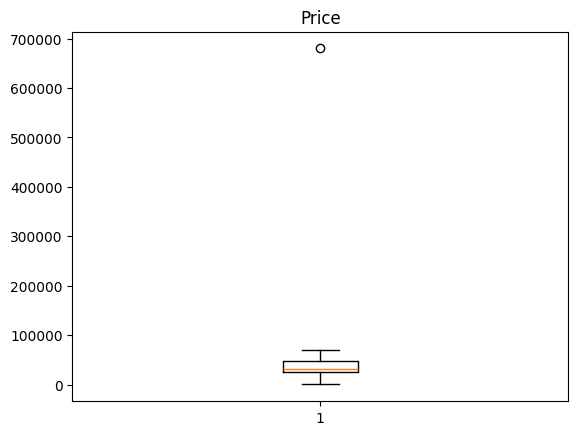

In [24]:
for col in ['Age','Salary','Partner_salary','Total_salary','Price']:
    plt.boxplot(cleaned_data[col])
    plt.title(f"{col}")
    plt.show()


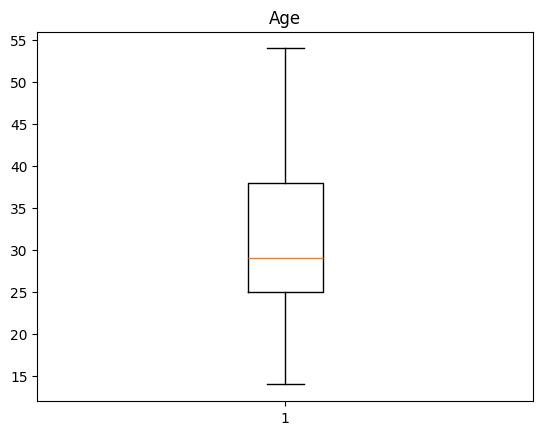

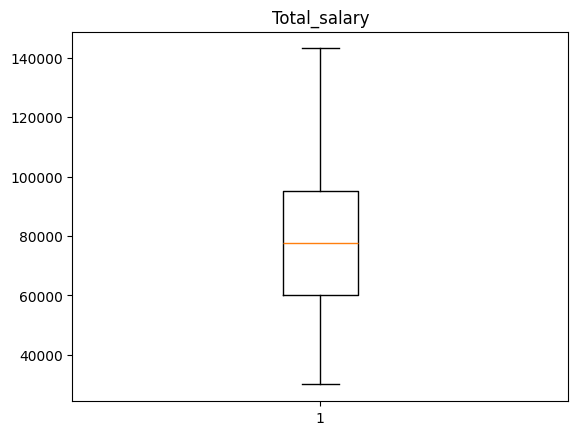

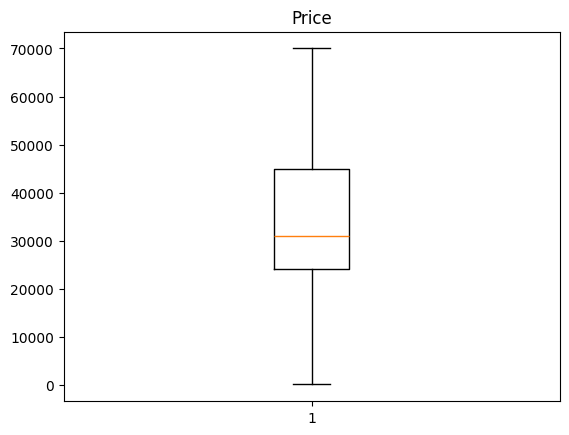

In [25]:
# Remove outliers
for col in ['Age','Total_salary','Price']:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    plt.boxplot(cleaned_data[col])
    plt.title(f"{col}")
    plt.show()


In [26]:
labeled_data = cleaned_data.copy()

In [27]:
LE = LabelEncoder()
for col in labeled_data.select_dtypes(exclude=['int','float']):
    labeled_data[col] =  LE.fit_transform(labeled_data[col])
labeled_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,0,1,0,0,0,1,0,1,72500.0,70300.0,142800,61000,2
4,53,1,1,0,1,3,0,0,1,79700.0,60200.0,139900,57000,1
5,53,0,1,0,1,3,0,0,1,79800.0,60500.0,140300,57000,1
6,53,0,1,0,1,3,1,0,1,80900.0,50800.0,131700,51000,1
7,52,1,1,0,0,4,0,0,1,79100.0,40400.0,119500,68000,1


In [28]:
cleaned_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,0,Yes,No,Yes,72500.0,70300.0,142800,61000,Sedan
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800.0,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900.0,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100.0,40400.0,119500,68000,SUV


# EDA

### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [29]:
print(f"Mean: {round(cleaned_data['Age'].mean(),2)}\nMedian: {cleaned_data['Age'].median()}\nMode: {cleaned_data['Age'].mode()[0]}")

Mean: 31.6
Median: 29.0
Mode: 28


### What is the distribution of gender in the dataset? Represent it using a pie chart.

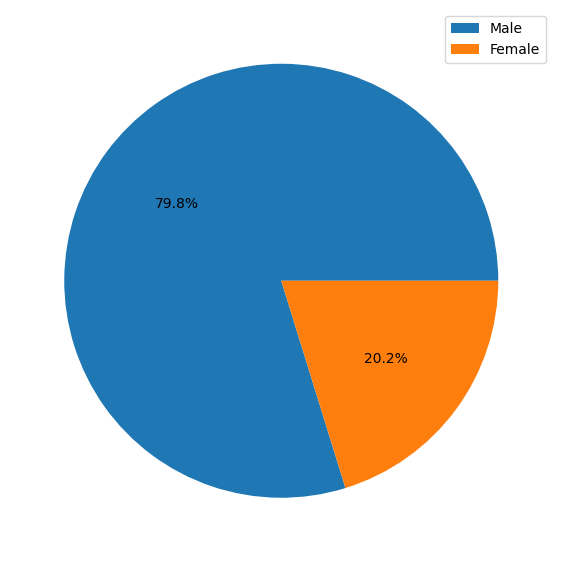

In [30]:
plt.figure(figsize=(7,9))
plt.pie(cleaned_data['Gender'].value_counts(),autopct='%1.1f%%')
plt.legend(['Male','Female'])
plt.show()

Our dataset set is imbalance dataset in term of gender.

### Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [31]:
numerical_data = cleaned_data.select_dtypes(include=['int','float'])

<Axes: >

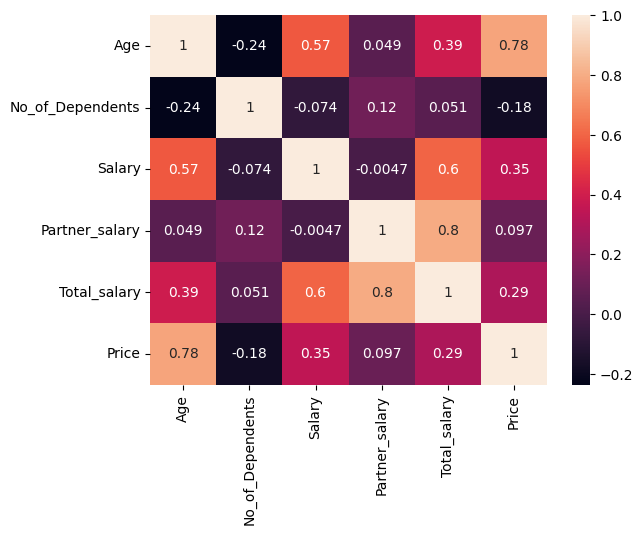

In [32]:
sns.heatmap(numerical_data.corr(),annot = True)

Total salary is strongly influenced by Partner Salary **(0.80)** and Salary **(0.60)**. Age is highly correlated with both Price (0.78) and Salary **(0.57)**. Number of dependents shows **weak or negative** impact on features.

### What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [33]:
avg_salary = cleaned_data.groupby(by='Education')['Salary'].mean()
avg_salary

Education
Graduate         48103.741763
Post Graduate    66775.381298
Name: Salary, dtype: float64

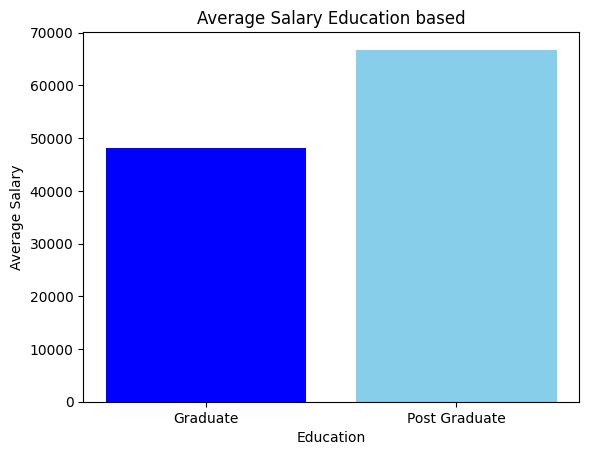

In [34]:
plt.bar(avg_salary.index, avg_salary,color=['blue','skyblue'])
plt.xlabel('Education')
plt.ylabel('Average Salary')
plt.title("Average Salary Education based")
plt.show()

### What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [35]:
loan_takers = cleaned_data[cleaned_data['Personal_loan']=='Yes'].groupby(by='Gender')['Personal_loan'].count()
print("Toal Personal Loan takers are: ",loan_takers.sum())
print("Percentage of Male more than female is:",round(((loan_takers[1]-loan_takers[0])/loan_takers[0])*100,2),'%')

Toal Personal Loan takers are:  785
Percentage of Male more than female is: 334.01 %


C:\Users\BioPh\AppData\Local\Temp\ipykernel_9628\236113954.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage of Male more than female is:",round(((loan_takers[1]-loan_takers[0])/loan_takers[0])*100,2),'%')


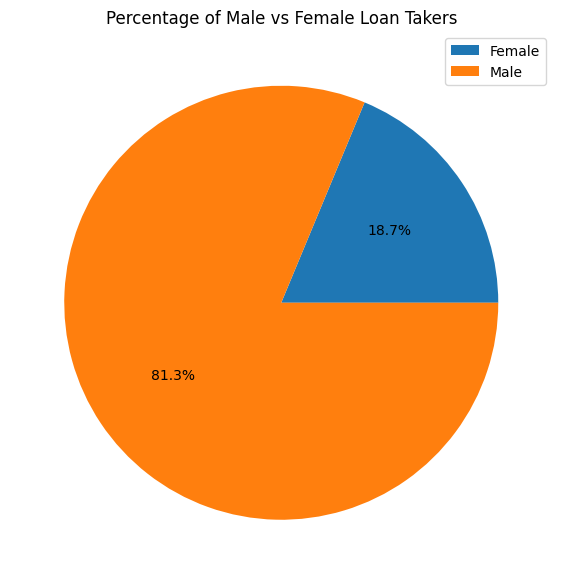

In [36]:
plt.figure(figsize=(7,9))
plt.pie(loan_takers,autopct='%1.1f%%')
plt.legend(labels=loan_takers.index)
plt.title("Percentage of Male vs Female Loan Takers")
plt.show()

### What is the average number of dependents for married individuals vs single individuals?

In [37]:
avg_dependent = cleaned_data.groupby(by='Marital_status')['No_of_Dependents'].mean()
avg_dependent

Marital_status
Married    2.522968
Single     1.608696
Name: No_of_Dependents, dtype: float64

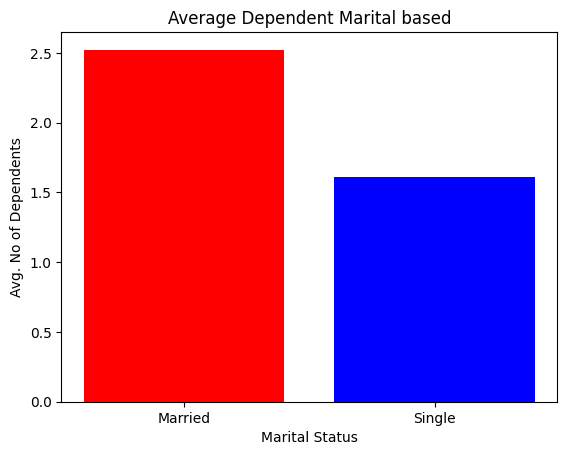

In [38]:
plt.bar(avg_dependent.index, avg_dependent,color=['red','blue'])
plt.xlabel('Marital Status')
plt.ylabel('Avg. No of Dependents')
plt.title("Average Dependent Marital based")
plt.show()

### How does the employment status of a partner affect the total combined salary?

In [39]:
salary_data = cleaned_data.groupby('Partner_working')['Total_salary'].mean()
salary_data

Partner_working
No     60527.208976
Yes    93143.452381
Name: Total_salary, dtype: float64

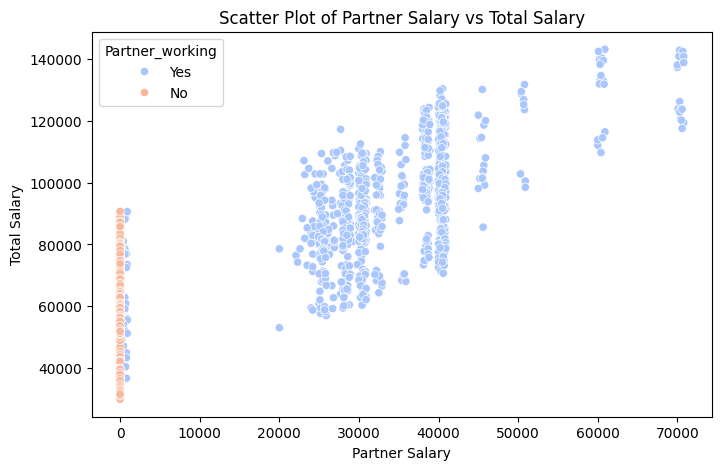

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Partner_salary', y='Total_salary', data=cleaned_data, hue='Partner_working', palette='coolwarm', alpha=1)
plt.xlabel('Partner Salary')
plt.ylabel('Total Salary')
plt.title('Scatter Plot of Partner Salary vs Total Salary')
plt.show()

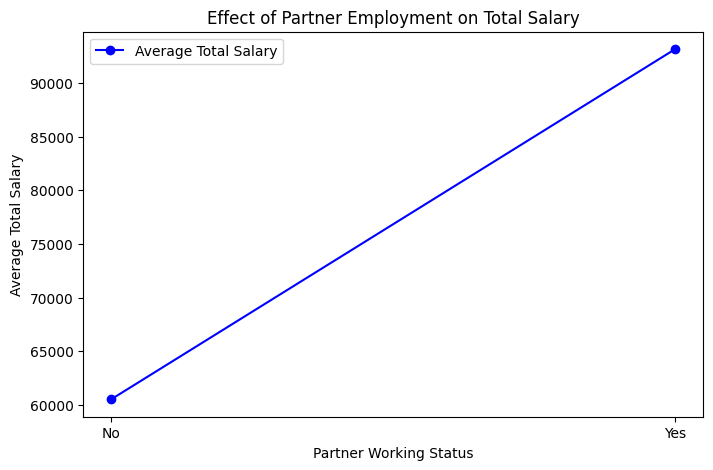

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(salary_data.index, salary_data.values, marker='o', linestyle='-', color='blue', label='Average Total Salary')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Total Salary')
plt.title('Effect of Partner Employment on Total Salary')
plt.legend()
plt.show()

### Compare the average salary of individuals whose partners are working versus those whose partners are not working.

In [42]:
avg_salary_data = cleaned_data.groupby('Partner_working')['Salary'].mean()
avg_salary_data

Partner_working
No     60271.528513
Yes    59181.309524
Name: Salary, dtype: float64

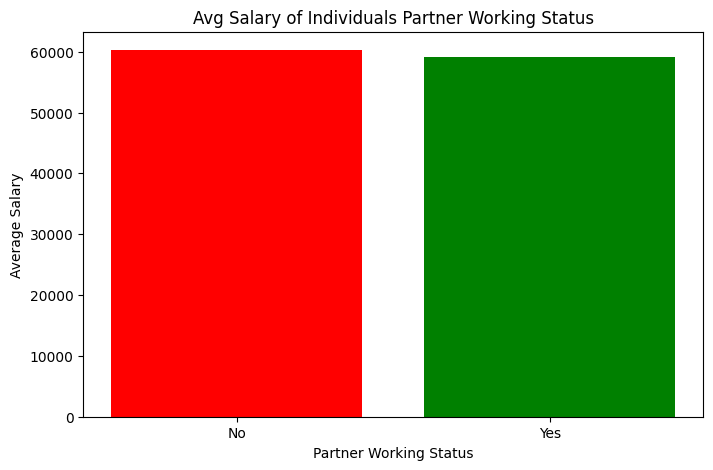

In [43]:
plt.figure(figsize=(8, 5))
plt.bar(avg_salary_data.index,avg_salary_data,color=['red','green'])
plt.xlabel('Partner Working Status')
plt.ylabel('Average Salary')
plt.title('Avg Salary of Individuals Partner Working Status')
plt.show()

### What is the proportion of individuals with house loans based on their profession?

In [44]:
house_loan = cleaned_data[cleaned_data['House_loan']=='Yes'].groupby(by='Profession')['House_loan'].count()
house_loan

Profession
Business    229
Salaried    298
Name: House_loan, dtype: int64

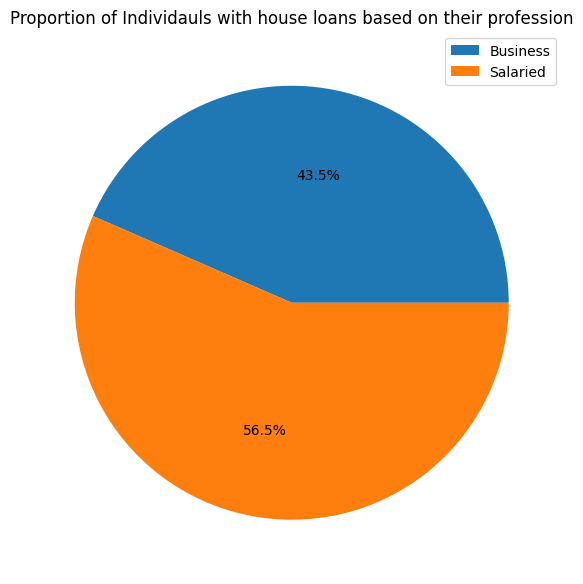

In [45]:
plt.figure(figsize=(7,9))
plt.pie(house_loan,autopct='%1.1f%%')
plt.legend(labels=house_loan.index)
plt.title("Proportion of Individauls with house loans based on their profession")
plt.show()

### What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

In [46]:
personal_loan_salaries = [group['Salary'].values for _, group in cleaned_data.groupby('Personal_loan')]

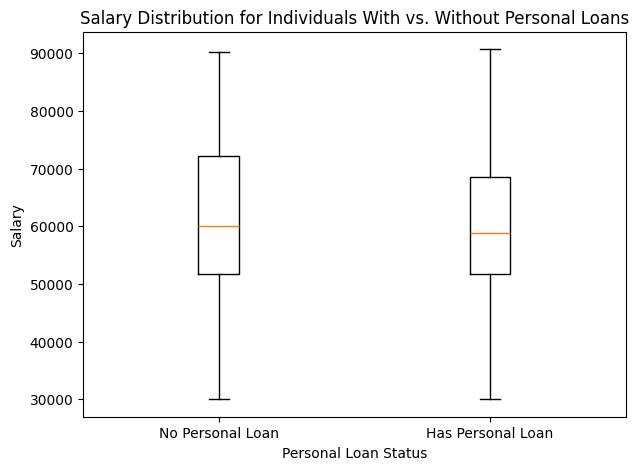

In [47]:
plt.figure(figsize=(7, 5))
plt.boxplot(personal_loan_salaries, labels=['No Personal Loan', 'Has Personal Loan'])
plt.title('Salary Distribution for Individuals With vs. Without Personal Loans')
plt.xlabel('Personal Loan Status')
plt.ylabel('Salary')
plt.show()

### How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

In [48]:
automobile_data = [group['Salary'].values for _,group in cleaned_data.groupby(by='Make')]

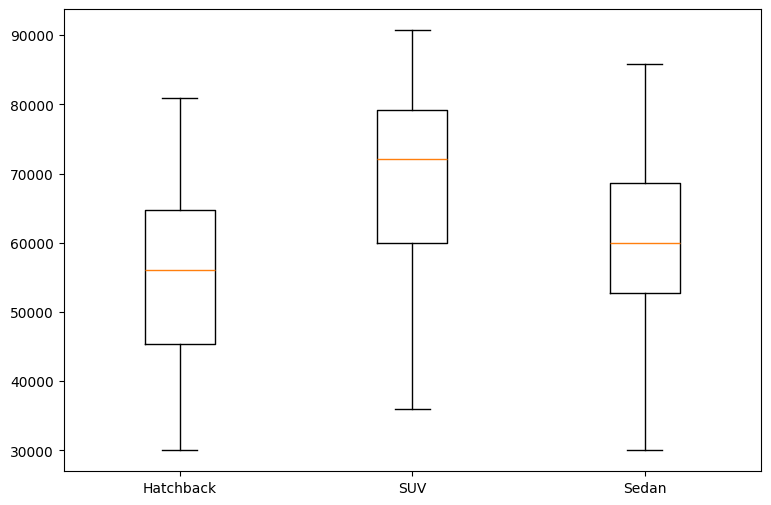

In [49]:
plt.figure(figsize=(9,6))
plt.boxplot(automobile_data,labels=['Hatchback','SUV','Sedan'])
plt.show()

### What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

In [50]:
print(f"Average Price of the Service are:\n{round(cleaned_data.groupby('Make')['Price'].mean(),2)}")

Average Price of the Service are:
Make
Hatchback    26474.23
SUV          54932.80
Sedan        34673.30
Name: Price, dtype: float64


<Figure size 1200x600 with 0 Axes>

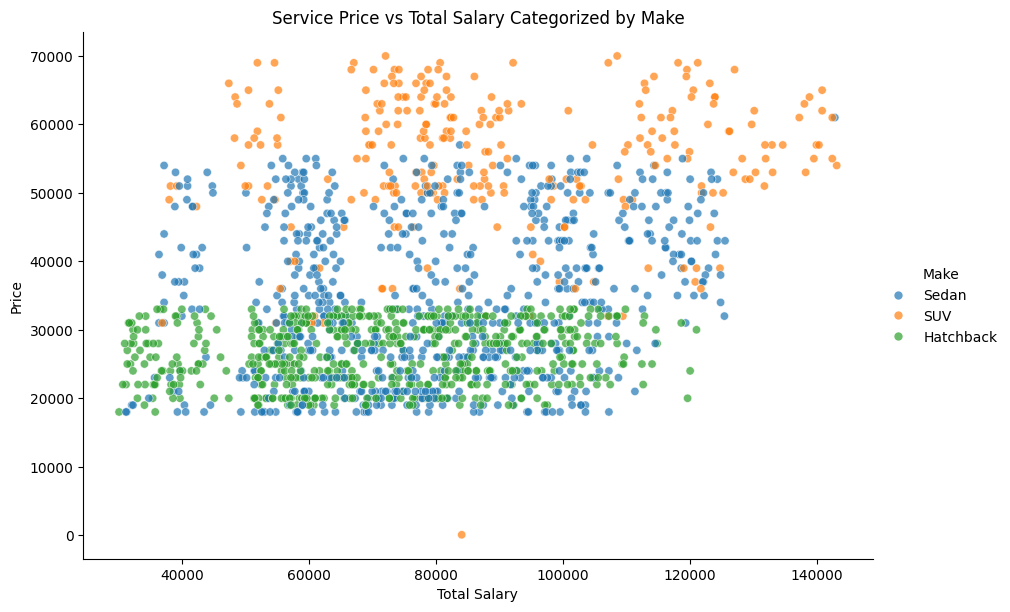

In [52]:
plt.figure(figsize=(12, 6))
sns.relplot(x="Total_salary", y="Price", hue="Make", data=cleaned_data, kind="scatter", height=6, aspect=1.5, alpha = 0.7)
plt.xlabel("Total Salary")
plt.ylabel("Price")
plt.title("Service Price vs Total Salary Categorized by Make")
plt.show()

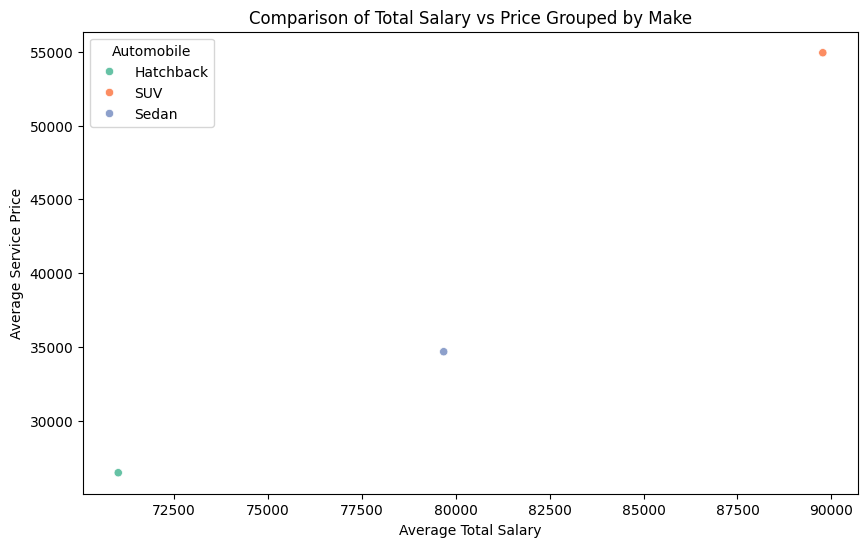

In [53]:
grouped_data = cleaned_data.groupby('Make').agg({'Total_salary': 'mean', 'Price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=grouped_data['Total_salary'], y=grouped_data['Price'], hue=grouped_data['Make'], palette='Set2')
plt.xlabel('Average Total Salary')
plt.ylabel('Average Service Price')
plt.title('Comparison of Total Salary vs Price Grouped by Make')
plt.legend(title='Automobile')

plt.show()


### Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?

In [54]:
personal_loans = cleaned_data[cleaned_data['Personal_loan']=='Yes'].groupby('Marital_status')['Personal_loan'].count()
personal_loans

Marital_status
Married    713
Single      72
Name: Personal_loan, dtype: int64

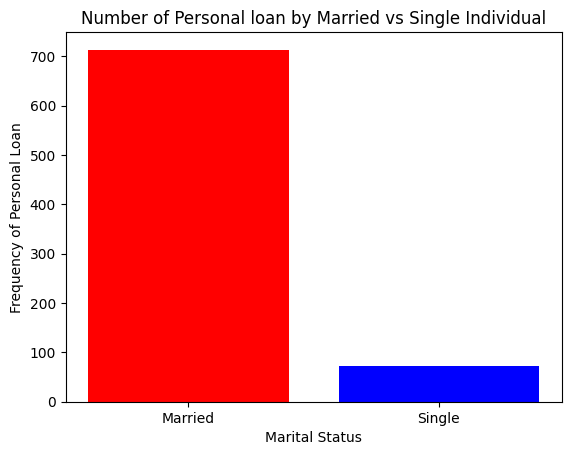

In [55]:
plt.bar(personal_loans.index, personal_loans,color=['red','blue'])
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Personal Loan')
plt.title("Number of Personal loan by Married vs Single Individual")
plt.show()

### How does educational qualification impact the likelihood of taking a house loan?

In [56]:
education_loan_counts = cleaned_data[cleaned_data['House_loan']=='Yes'].groupby('Education')['House_loan'].count()
print(education_loan_counts)
print(f"Percentage of House loan taken by UG Individuals compared to PG Individuals is:{round((education_loan_counts.iloc[1]-education_loan_counts.iloc[0])/education_loan_counts.iloc[0]*100,2)}%")

Education
Graduate         202
Post Graduate    325
Name: House_loan, dtype: int64
Percentage of House loan taken by UG Individuals compared to PG Individuals is:60.89%


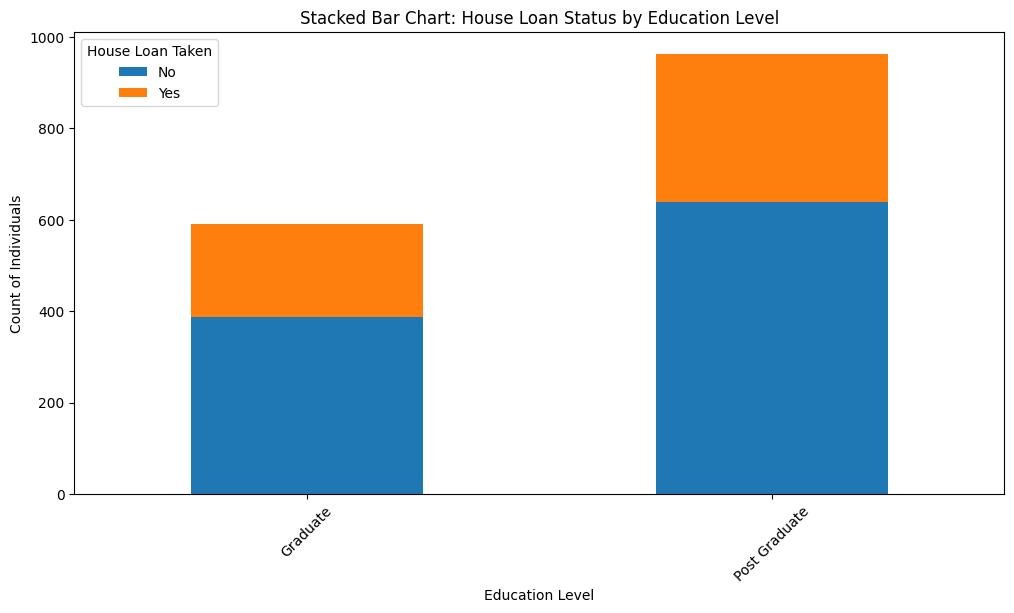

In [57]:
education_loan_counts = pd.crosstab(cleaned_data["Education"], cleaned_data["House_loan"])

# Plot the stacked bar chart
education_loan_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Education Level")
plt.ylabel("Count of Individuals")
plt.title("Stacked Bar Chart: House Loan Status by Education Level")
plt.legend(title="House Loan Taken")
plt.xticks(rotation=45)
plt.show()

### Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [58]:
profession_dependents_counts = cleaned_data.groupby('Profession')['No_of_Dependents'].mean()
profession_dependents_counts

Profession
Business    2.481536
Salaried    2.410959
Name: No_of_Dependents, dtype: float64

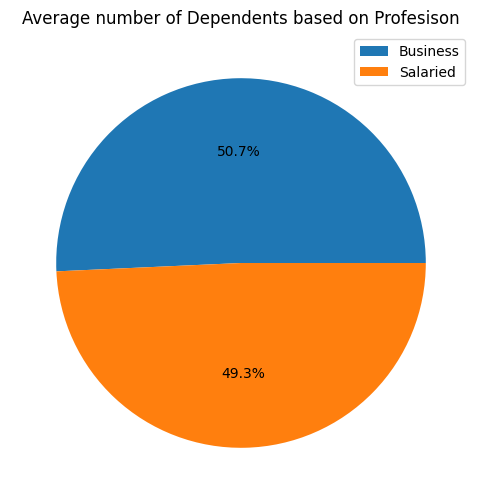

In [59]:
plt.figure(figsize=(10,6))
plt.pie(profession_dependents_counts,autopct='%1.1f%%')
plt.title('Average number of Dependents based on Profesison')
plt.legend(labels=profession_dependents_counts.index)
plt.show()

### Is there a significant difference in salaries between males and females? Provide statistical evidence.

In [60]:
gender_based_salary = cleaned_data.groupby('Gender')['Salary'].describe()
gender_based_salary

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,314.0,64651.322548,13380.494098,34800.0,56050.0,63050.0,76075.0,90700.0
Male,1239.0,58422.424980,13873.466699,30000.0,51050.0,58300.0,68500.0,89900.0


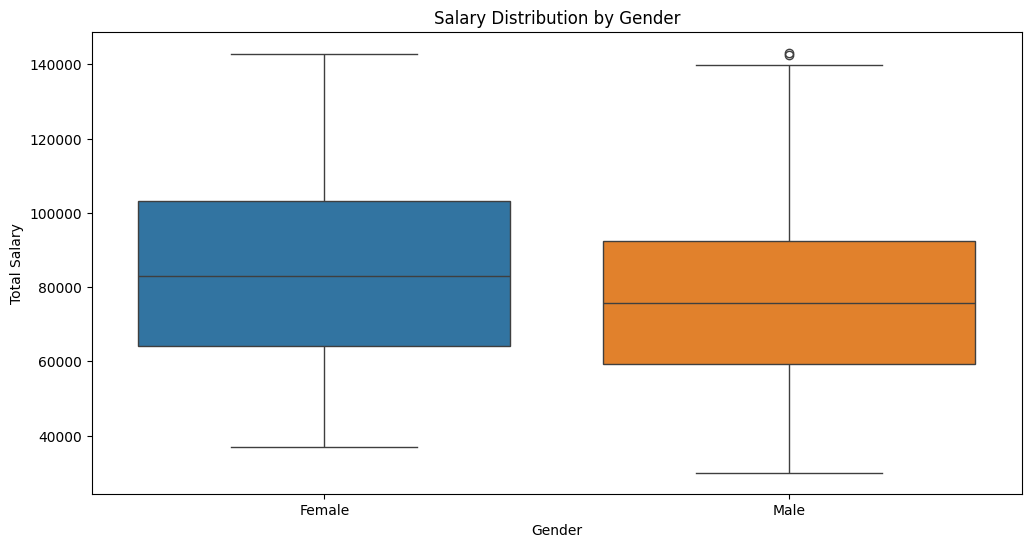

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Gender", y="Total_salary", data=cleaned_data,hue='Gender')
plt.xlabel("Gender")
plt.ylabel("Total Salary")
plt.title("Salary Distribution by Gender")
plt.show()

### How does having a personal loan affect the total combined salary of the individual and their partner?

In [62]:
salary_by_loan = cleaned_data.groupby("Personal_loan")["Total_salary"].mean()
print(salary_by_loan)

Personal_loan
No     78927.604167
Yes    77426.751592
Name: Total_salary, dtype: float64


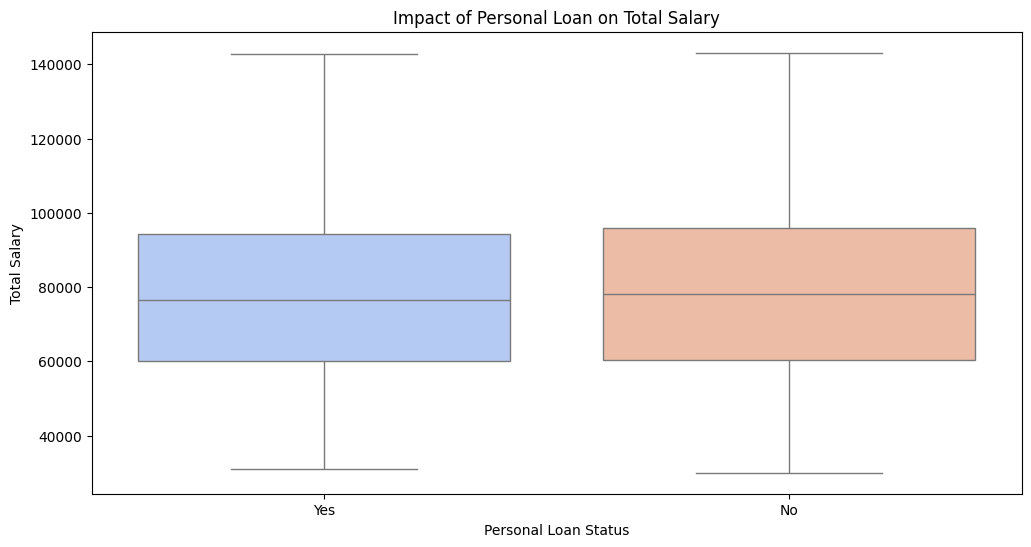

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Personal_loan", y="Total_salary", data=cleaned_data, hue='Personal_loan',palette="coolwarm")
plt.xlabel("Personal Loan Status")
plt.ylabel("Total Salary")
plt.title("Impact of Personal Loan on Total Salary")
plt.show()


### What is the average partner's salary for individuals with and without house loans?

In [64]:
houseLoan_partner_salary = cleaned_data.groupby('House_loan')['Partner_salary'].mean()
round(houseLoan_partner_salary,2)

House_loan
No     18366.08
Yes    18376.85
Name: Partner_salary, dtype: float64

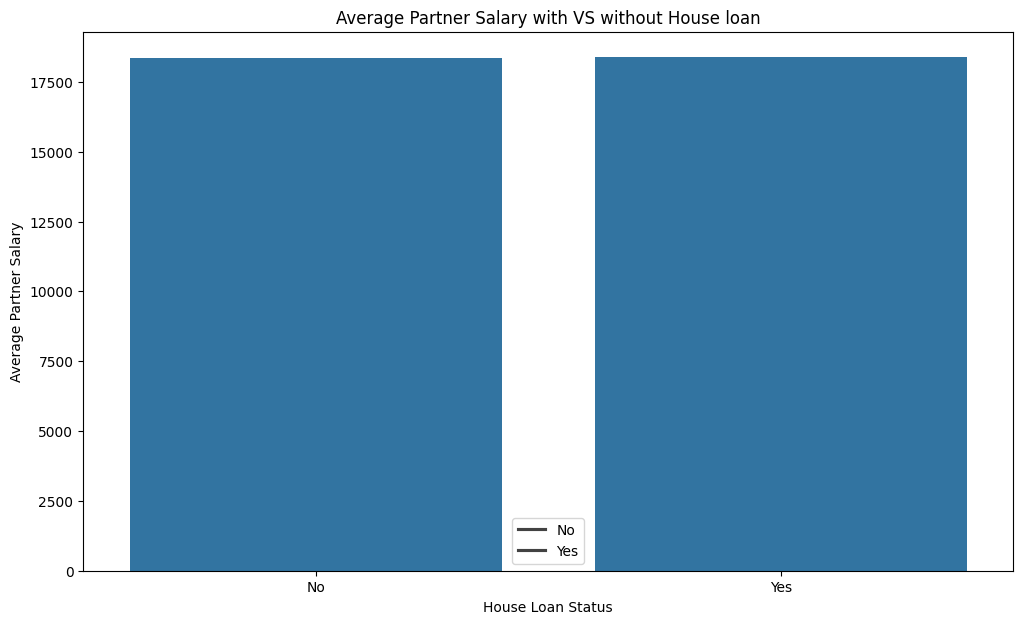

In [65]:
plt.figure(figsize=(12,7))
sns.barplot(houseLoan_partner_salary,)
plt.legend(labels=houseLoan_partner_salary.index)
plt.xlabel('House Loan Status')
plt.ylabel('Average Partner Salary')
plt.title('Average Partner Salary with VS without House loan')
plt.show()

### Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.

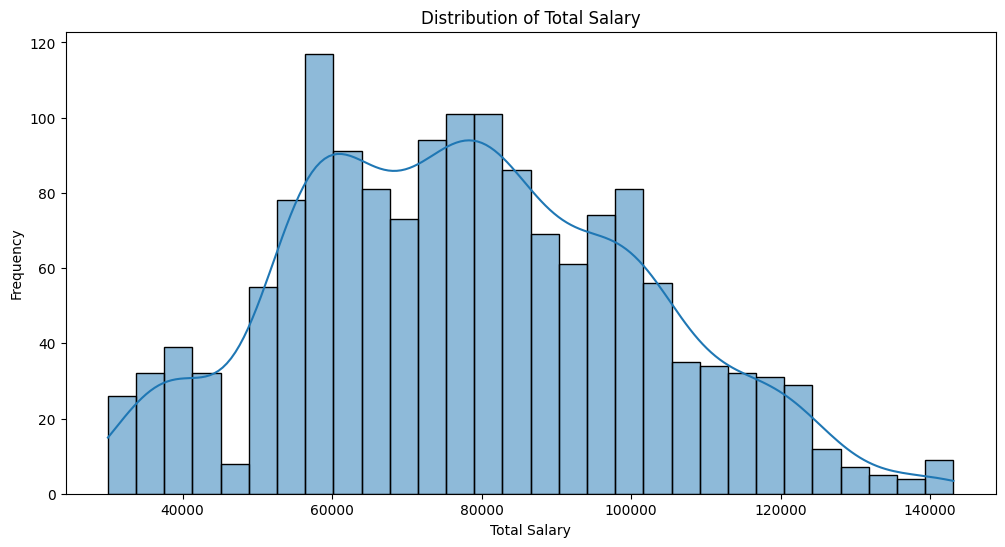

In [66]:
plt.figure(figsize=(12,6))
sns.histplot(x='Total_salary',bins=30,data=cleaned_data,kde=True)
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Total Salary')
plt.show()